In [1]:
import os

import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw import transform
from schemdraw.util import Point
from schemdraw.drawing_stack import drawing_stack

In [2]:
Point((1, 1))

Point(1,1)

In [3]:
p1 = Point((1, 1))
p2 = Point((2, 2))
p3 = p1 + p2
assert p3 == Point((3, 3))
p3

Point(3,3)

In [4]:
p4 = p2-p1
assert p4 == Point((1, 1))
assert p2-1 == Point((1, 1))
assert 1 - p2 == Point((-1, -1))
p4

Point(1,1)

In [5]:
t = transform.Transform(0, (0,0))
t

Transform: xy=Point(0,0); theta=0; scale=Point(1,1); lshift=Point(0,0)

In [6]:
assert t.transform((1, 1)) == Point((1, 1))

In [7]:
t = transform.Transform(0, (1, 1))
assert t.transform((1, 1)) == Point((2, 2))

In [8]:
# add_elements function
d = schemdraw.Drawing()
d.add_elements(
    elm.Resistor(),
    elm.Capacitor(),
    elm.Diode())
d

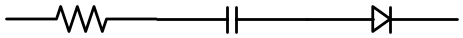

In [9]:
# Context Manager - file save, should still draw in Jupyter
try:
    os.remove('savetest.png')
except FileNotFoundError:
    pass

with schemdraw.Drawing(file='savetest.png') as d:
    d += elm.Resistor()
    d += elm.Capacitor()
    d += elm.Diode()
    
assert os.path.exists('savetest.png')

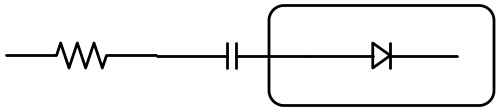

In [10]:
# Drawing stack, containers
with schemdraw.Drawing() as d:
    assert len(drawing_stack) == 1
    r = elm.Resistor()
    assert r.start is not None  # Make sure attributes are accessible
    c = elm.Capacitor()
    with d.container() as c:
        q = elm.Diode()
        assert len(drawing_stack) == 2
    assert q.start is not None  # Variables set inside the container are still accessible
    assert len(drawing_stack) == 1
assert len(drawing_stack) == 0

In [11]:
# Matplotlib backend
d.draw(canvas='matplotlib')
d.get_imagedata('svg')

b'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="360.36pt" height="81.36pt" viewBox="0 0 360.36 81.36" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2024-04-27T14:01:49.121507</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.8.0, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <pat

In [12]:
# SVG backend
d.draw(canvas='svg')
d.get_imagedata('svg')

b'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="360.36pt" height="81.36pt" viewBox="0 0 360.36 81.36" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2024-04-27T14:01:49.170025</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.8.0, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <pat

In [13]:
schemdraw.svgconfig.text = 'path'  # use ziamath

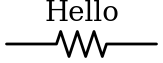

In [14]:
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw(canvas='matplotlib')

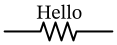

In [15]:
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw(canvas='svg')

In [16]:
d.save('savetest.svg')

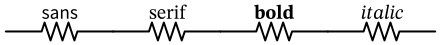

In [17]:
# These text styles only work in SVG backend
d = schemdraw.Drawing(fontsize=20)
d += elm.Resistor().label('sans', font='sans')
d += elm.Resistor().label('serif', font='serif')
d += elm.Resistor().label('bold', font='bold')
d += elm.Resistor().label('italic', font='italic')
d.draw(canvas='svg')

In [18]:
schemdraw.svgconfig.text = 'path'
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label(r'$x^2$', valign='bottom')
d.draw(canvas='svg')
assert '<symbol' in d.get_imagedata('svg').decode()

In [19]:
schemdraw.svgconfig.svg2 = False   # use ziamath with SVG1.x
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label(r'$x^2$', valign='bottom')
d.draw(canvas='svg')
d.get_imagedata('svg').decode()
assert '<symbol' not in d.get_imagedata('svg').decode()

In [20]:
schemdraw.svgconfig.text = 'text'   # use <text>
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label(r'$x^2$', valign='bottom')
d.draw(canvas='svg')
assert '<text' in d.get_imagedata('svg').decode()

In [21]:
schemdraw.svgconfig.text = 'path'
schemdraw.svgconfig.svg2 = True

In [22]:
# Draw on matplotlib axis, or specify existing axis
import matplotlib.pyplot as plt

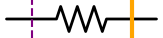

In [23]:
schemdraw.use('matplotlib')
d = schemdraw.Drawing()
d.add(elm.Resistor())
schemfig = d.draw()
schemfig.ax.axvline(.5, color='purple', ls='--')
schemfig.ax.axvline(2.5, color='orange', ls='-', lw=3);
display(schemfig)

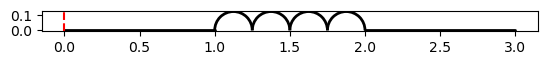

In [24]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
d = schemdraw.Drawing()
d += elm.Inductor()
d.draw(canvas=ax)
ax.axvline(0, ls='--', color='red');

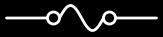

In [25]:
schemdraw.theme('dark')
d = schemdraw.Drawing()
d += elm.FuseUS()
d.draw()

In [26]:
d.save('testMPL.png')

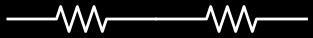

In [27]:
# Capstyle names are different in SVG vs Matplotlib
# projecting == butt
d = schemdraw.Drawing()
d += elm.Resistor(capstyle='butt')
d += elm.Resistor(capstyle='projecting')
d.draw()

In [28]:
d = schemdraw.Drawing()
d += elm.Resistor(capstyle='butt')
d += elm.Resistor(capstyle='projecting')
d.draw(canvas='svg')

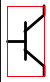

In [29]:
schemdraw.theme('default')
schemdraw.debug()
d = schemdraw.Drawing()
d += elm.Bjt()
d.draw(canvas='matplotlib')

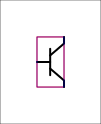

In [30]:
d = schemdraw.Drawing()
d.config(margin=1)
d += elm.Bjt()
d.draw(canvas='svg')

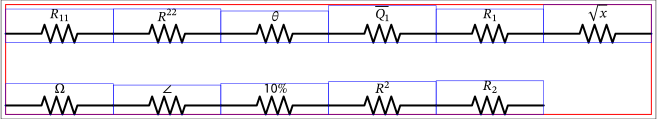

In [31]:
# Test some mathtext in svg backend
schemdraw.use('svg')
d = schemdraw.Drawing(font='sans')
d += elm.Resistor().label('$R_{11}$')
d += elm.Resistor().label('$R^{22}$')
d += elm.Resistor().label(r'$\theta$')
d += elm.Resistor().label(r'$\overline{Q_1}$')
d += elm.Resistor().label('$R_1$')
d += elm.Resistor().label(r'$\sqrt{x}$')
d.here = (0, -2)
d += elm.Resistor().label('Ω')
d += elm.Resistor().label('∠')
d += elm.Resistor().label('10%')
d += elm.Resistor().label('$R^2$')
d += elm.Resistor().label('$R_2$')
d.draw()

In [32]:
schemdraw.debug(False, False)

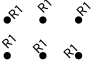

In [33]:
# Test some mathtext in svg backend
schemdraw.use('svg')
d = schemdraw.Drawing()
d += elm.Dot().label('R1', rotate=45)
d += elm.Dot().at((1, 0)).label('R1', rotate=45, halign='center')
d += elm.Dot().at((2, 0)).label('R1', rotate=45, halign='right')
d += elm.Dot().at((0, 1)).label('R1', rotate=45, valign='top')
d += elm.Dot().at((1, 1)).label('R1', rotate=45, valign='bottom')
d += elm.Dot().at((2, 1)).label('R1', rotate=45, valign='center')
d.draw()

In [34]:
from schemdraw.backends import svgtext
from IPython.display import SVG
from xml.etree import ElementTree as ET
# These should appear similar to
# https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/demo_text_rotation_mode.html

In [35]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('ABC', 50, 50, halign='left', rotation=45, testmode=True)
SVG(svghead.format(ET.tostring(s, encoding='unicode')))

In [36]:
# "anchor" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

In [37]:
# "default" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

In [38]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('$A^x$ + $B_1$', 50, 50, halign='left', rotation=145, testmode=True)
SVG(svghead.format(ET.tostring(s)))

In [39]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('$A^{xy}$ + $B_{11}$', 50, 50, halign='left', size=22, rotation=-45, testmode=True)
SVG(svghead.format(ET.tostring(s)))

In [40]:
#schemdraw.settextmode('text')
schemdraw.svgconfig.text = 'text'

In [41]:
# "default" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       rotation_mode='default', testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

In [42]:
# "anchor" rotation mode
s = ET.tostring(svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       testmode=True),
                encoding='unicode')
s += ET.tostring(svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       testmode=True),
                encoding='unicode')

SVG(svghead.format(s))

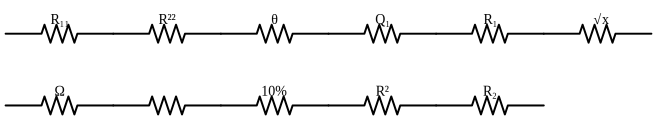

In [43]:
# Test some mathtext in svg backend - text mode
schemdraw.use('svg')
d = schemdraw.Drawing(font='Times')
d += elm.Resistor().label('$R_{11}$')
d += elm.Resistor().label('$R^{22}$')
d += elm.Resistor().label(r'$\theta$')
d += elm.Resistor().label(r'$\overline{Q_1}$')
d += elm.Resistor().label('$R_1$')
d += elm.Resistor().label(r'$\sqrt{x}$')
d.here = (0, -2)
d += elm.Resistor().label('Ω')
d += elm.Resistor().label('∠')
d += elm.Resistor().label('10%')
d += elm.Resistor().label('$R^2$')
d += elm.Resistor().label('$R_2$')
d.draw()

In [44]:
import copy
import pickle

In [45]:
d = schemdraw.Drawing()
d.add(r:=elm.Resistor())
copy.deepcopy(d)

In [46]:
pickle.loads(pickle.dumps(d))

In [47]:
from schemdraw.segments import *

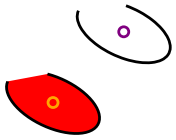

In [48]:
# Matplotlib doesn't support filled Arcs, so
# we have to fake them with a path

class ArcTest(elm.Element):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.segments.append(SegmentArc((0,0), 1, 2, 90, 20, angle=20, fill='red'))
        self.segments.append(SegmentArc((2,0), 1, 2, 90, 20, angle=20, fill=None))

        self.segments.append(SegmentCircle((0,0), .1, color='orange'))
        self.segments.append(SegmentCircle((2,0), .1, color='purple'))

schemdraw.use('matplotlib')
ArcTest().theta(45)

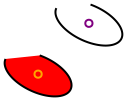

In [49]:
schemdraw.use('svg')
ArcTest().theta(45)